## Task 1

In [3]:
import numpy as np
    
def getsize(A):
    return A.shape    

def SVD(A):
    rows, cols = getsize(A)

    ATA = A.T @ A
    AAT = A @ A.T

    eigenvalues_V, eigenvectors_V = np.linalg.eigh(ATA)
    eigenvalues_U, eigenvectors_U = np.linalg.eigh(AAT)

    sorted_eigen_V = np.argsort(eigenvalues_V)[::-1]
    sorted_eigen_U = np.argsort(eigenvalues_U)[::-1]
    
    eigenvalues_V = eigenvalues_V[sorted_eigen_V]
    eigenvectors_V = eigenvectors_V[:, sorted_eigen_V]
    eigenvalues_U = eigenvalues_U[sorted_eigen_U]
    eigenvectors_U = eigenvectors_U[:, sorted_eigen_U]
    
    # Step 4: Compute singular values
    singular_values = np.sqrt(eigenvalues_V)
    
    # Step 5: Form the matrices U, Σ (Sig), and V^T
    U = eigenvectors_U
    Sig = np.zeros((rows, cols))
    np.fill_diagonal(Sig, singular_values)
    V = eigenvectors_V.T
    
    return U, Sig, V

A = np.array([[1.2, 2.0, 3, 4],
              [2, 1, 3, 4],
              [1, 2, 3, 3]])
U, S, VT = SVD(A)
A_reconstructed_my = np.round(U @ S @ VT)

print("Original Matrix:\n", A)
print("U:\n", U)
print("S:\n", S)
print("VT:\n", VT)
print("Reconstructed Matrix:\n", A_reconstructed_my)
print("Difference:\n", A - A_reconstructed_my)


Original Matrix:
 [[1.2 2.  3.  4. ]
 [2.  1.  3.  4. ]
 [1.  2.  3.  3. ]]
U:
 [[-0.60782362  0.25823322 -0.75091015]
 [-0.59680054 -0.77235709  0.21747103]
 [-0.52381253  0.58032761  0.62357061]]
S:
 [[9.04906382 0.         0.         0.        ]
 [0.         1.17727337 0.         0.        ]
 [0.         0.         0.41045256 0.        ]]
VT:
 [[-0.27039283 -0.31606284 -0.57302171 -0.70614313]
 [-0.55595134  0.76852547  0.16870442 -0.26800287]
 [-0.38352905  0.09065129 -0.65877152  0.64086496]
 [ 0.68608403  0.54886722 -0.45738935 -0.13721681]]
Reconstructed Matrix:
 [[1. 2. 3. 4.]
 [2. 1. 3. 4.]
 [1. 2. 3. 3.]]
Difference:
 [[0.2 0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]]


[[ 0.70871391 -0.33535764  0.09296504 -0.03512916 -0.45685515]
 [ 0.02726311  0.0880204   0.43669991 -0.63524784  0.48020396]
 [ 0.01202653 -0.05961833  0.2693743   0.76001901  0.42360706]
 [-0.70386816 -0.37761246  0.12853428 -0.04926365 -0.41995691]
 [-0.03677025  0.84194663 -0.08870624  0.06453129 -0.33327777]
 [-0.00736515 -0.15737859 -0.83886728 -0.10490964  0.30627881]]


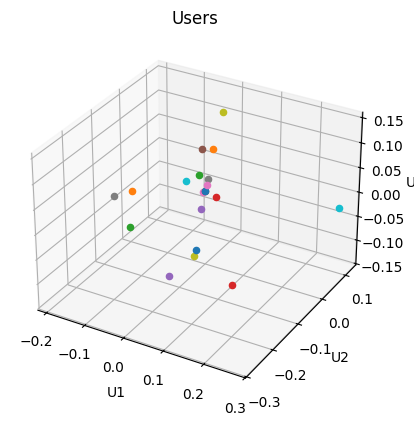

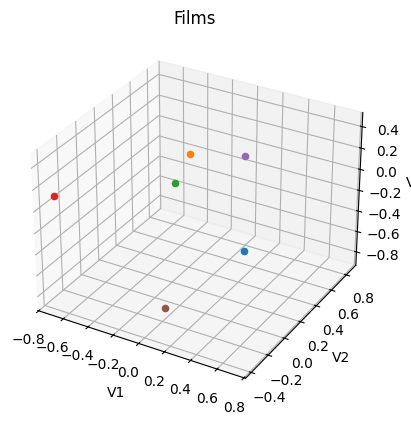

In [4]:
import pandas as pd
from scipy.sparse.linalg import svds
import numpy as np
import matplotlib.pyplot as plt

file_path = 'ratings.csv'
df = pd.read_csv(file_path)

ratings_matrix = df.pivot(index='userId', columns='movieId', values='rating')

ratings_matrix = ratings_matrix.dropna(thresh=200, axis=0)
ratings_matrix = ratings_matrix.dropna(thresh=100, axis=1)


ratings_matrix_filled = ratings_matrix.fillna(2.5)
R = ratings_matrix_filled.values
user_ratings_mean = np.mean(R, axis=1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)


U, sigma, Vt = svds(R_demeaned, k=5)
V = Vt.T
print(V)

# Visualize U
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot first 20 users
for i in range(20):
    ax.scatter(U[i, 0], U[i, 1], U[i, 2])
    ax.text(U[i, 0], U[i, 1], U[i, 2], f'', size=8, zorder=1, color='k')

# Label the axes
ax.set_xlabel('U1')
ax.set_ylabel('U2')
ax.set_zlabel('U3')

ax.set_title('Users')

plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Visualization of all films
for i in range(6):
    ax.scatter(V[i, 0], V[i, 1], V[i, 2])
    ax.text(V[i, 0], V[i, 1], V[i, 2], f'', size=8, zorder=1, color='k')

ax.set_xlabel('V1')
ax.set_ylabel('V2')
ax.set_zlabel('V3')

ax.set_title('Films')

plt.show()

## Task 2.2

In [5]:
# calculate mean rating of every user
R = ratings_matrix_filled.values
user_ratings_mean = np.mean(R, axis=1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

U, sigma, Vt = svds(R_demeaned, k=3)

## Experiments

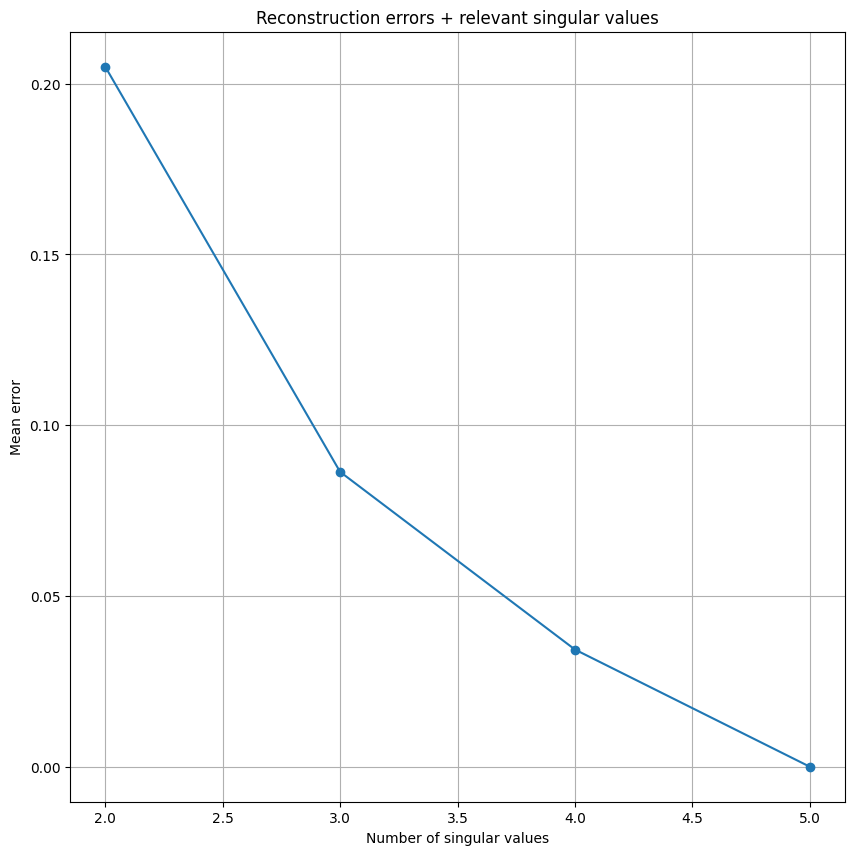

In [6]:
def svd_reconstruction(R_demeaned, key, user_ratings_mean):
    U, S, Vt = svds(R_demeaned, k=key)
    S = np.diag(S)
    reconstructed_R = np.dot(U, np.dot(S, Vt)) + user_ratings_mean.reshape(-1, 1)
    return reconstructed_R


keys = [5, 4, 3, 2]
reconstructions = []

for k in keys:
    reconstructed_R = svd_reconstruction(R_demeaned, k, user_ratings_mean)
    # for each k find mean error
    error = np.mean((R - reconstructed_R) ** 2)
    reconstructions.append(error)

plt.figure(figsize=(10, 10))
plt.plot(keys, reconstructions, marker='o')
plt.title('Reconstruction errors + relevant singular values')
plt.xlabel('Number of singular values')
plt.ylabel('Mean error')
plt.grid(True)
plt.show()

# Conclusions:
Чим меншe значення k, тим менш точно відбувається відновлення, але швидкість обчислення виростає
Отже, оскліьки зростає розмір похибки, підбір схожих даних для користувачів стає менш релевантним, але виконується швидше.
Можна використовувати різні ключі щоб змінювати підбір серіалів і зробити його більш різноманітним

# №3

In [7]:
import numpy as np
sigma = np.diag(sigma)

all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns=ratings_matrix.columns, index=ratings_matrix.index)

movies_matrix = pd.read_csv('movies.csv')
print(movies_matrix)
movies_df = pd.DataFrame(movies_matrix, columns=movies_matrix.columns, index=movies_matrix.index)
print(movies_df)

print(R_demeaned)
print(all_user_predicted_ratings)

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  
4                  

# №6


In [8]:
predicted = ratings_matrix.copy()

# Replace initial values on NaN
predicted[~ratings_matrix.isna()] = np.nan

# NaN replace NaN with predicted ratings
predicted.fillna(round(preds_df, 2), inplace=True)

print(predicted)

movieId  260   296   356   1196  1210  2571
userId                                     
1        5.01  3.01  3.99  4.91  5.10  4.98
4        4.45  1.15  2.40  4.35  3.91  0.74
6        2.42  2.02  4.99  2.44  2.66  2.47
18       4.12  3.97  4.52  4.11  4.24  4.55
19       3.73  2.58  1.95  3.66  3.72  3.87
...       ...   ...   ...   ...   ...   ...
603      3.31  5.02  2.96  3.35  3.43  4.93
605      4.21  1.85  3.05  4.13  4.06  2.70
606      4.50  5.00  4.00  4.50  4.50  5.00
608      3.80  5.00  3.01  3.82  3.85  5.02
610      5.06  4.99  3.01  5.03  4.90  5.02

[134 rows x 6 columns]


# №8

In [9]:
import numpy as np
import pandas as pd

def recommend_movies(user_id, preds_df, movies_df, ratings_matrix, num_recommendations=10):
    # Fetch the predicted ratings for the user
    user_pred_ratings = preds_df.loc[user_id]
    
    # Movies that the user has already rated
    # if user rated a movie - do not reccomend it
    user_rated_movies = ratings_matrix.loc[user_id].dropna().index
    user_pred_ratings = user_pred_ratings.drop(user_rated_movies, errors='ignore').sort_values(ascending=False)
    print("User Rated Movies:", user_rated_movies)
    
    # Create recommendations DataFrame
    recommendations = (movies_df.set_index('movieId')
                       .loc[user_pred_ratings.index]
                       .assign(predicted_rating=user_pred_ratings.values))
    
    # Get the top recommendations
    top_recommendations = recommendations.head(num_recommendations)
    
    return top_recommendations[['title', 'genres', 'predicted_rating']]


user_id = 4
top10 = recommend_movies(user_id, preds_df, movies_df, ratings_matrix)
print("Top 10 Recommendations:\n", top10)

User Rated Movies: Index([260, 296, 1196, 2571], dtype='int64', name='movieId')
Top 10 Recommendations:
                                                      title  \
movieId                                                      
1210     Star Wars: Episode VI - Return of the Jedi (1983)   
356                                    Forrest Gump (1994)   

                           genres  predicted_rating  
movieId                                              
1210      Action|Adventure|Sci-Fi          3.912461  
356      Comedy|Drama|Romance|War          2.400151  
